In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 3mv.csv to 3mv (2).csv


In [ ]:
# csv 파일을 읽어서 DataFrame 객체로 만듦. 인덱스 컬럼은 point로 설정
dg = pd.read_csv('3mv.csv')
dg=dg[:495]
v=np.array(dg['v'], dtype='object')
t=np.array(dg['t'])
#v

In [ ]:
uploaded=files.upload()

Saving v.csv to v (1).csv


In [ ]:

dg = pd.read_csv('v.csv')
dg=dg[:495]
v=np.array(dg['v1'])
v=np.vstack([v,np.array(dg['v2'])])
v=np.vstack([v,np.array(dg['v3'])])
v=np.vstack([v,np.array(dg['v4'])])
v=np.vstack([v,np.array(dg['v5'])])
v=np.vstack([v,np.array(dg['v6'])])
v=np.vstack([v,np.array(dg['v7'])])
v=np.vstack([v,np.array(dg['v8'])])
v=np.vstack([v,np.array(dg['v9'])])
v=np.vstack([v,np.array(dg['v10'])])
t=np.array(dg['t'])
#v

No handles with labels found to put in legend.


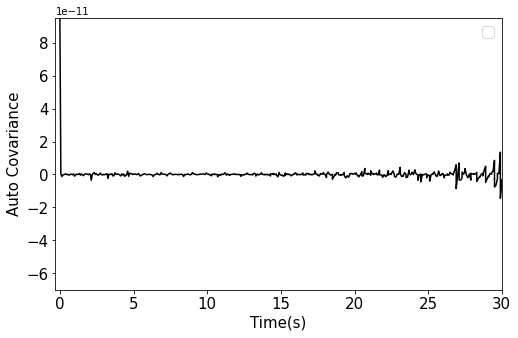

In [ ]:
# autocorrelation, (averaged over all trajectory)
autocorr = np.zeros(495)

autocorr[0] = np.average(v*v)

for i in range (494):
    autocorr[i+1] = np.average(v[:,i+1:]*v[:,:-i-1])



fig = plt.figure(1,figsize=(8,5))
plt.plot(t, autocorr,color='black')
plt.ylim([-1e-10, 2e-10])     # Y축의 범위: [ymin, ymax]
# plt.axis([0, 5, 0, 20])  # X, Y축의 범위: [xmin, xmax, ymin, ymax]
plt.xlim(-0.3, 30)
plt.ylim(-0.7e-10,0.95e-10)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time(s)',fontsize=15)
plt.ylabel('Auto Covariance',fontsize=15)
plt.savefig('auto_covar_3.png')
plt.show()
# this shows delta_correlation

In [ ]:
uploaded=files.upload()

Saving 3m.csv to 3m (1).csv


In [ ]:
# csv 파일을 읽어서 DataFrame 객체로 만듦. 인덱스 컬럼은 point로 설정
df = pd.read_csv('3m.csv')
df=df[:495]
df
x=np.array(df['x1'])
x=np.vstack([x,np.array(df['x2'])])
x=np.vstack([x,np.array(df['x3'])])
x=np.vstack([x,np.array(df['x4'])])
x=np.vstack([x,np.array(df['x5'])])
y=np.array(df['y1'])
y=np.vstack([y,np.array(df['y2'])])
y=np.vstack([y,np.array(df['y3'])])
y=np.vstack([y,np.array(df['y4'])])
y=np.vstack([y,np.array(df['y5'])])
# x
# y

In [ ]:
for i,arr in enumerate(x) :

  if i == 0 :
    arr = arr[10:300]
    xt = np.array(arr)
  else :
    arr = arr[10:300]
    xt = np.vstack([xt,arr])

for i,arr in enumerate(y) :

  if i == 0 :
    arr = arr[10:300]
    yt = np.array(arr)
  else :
    arr = arr[10:300]
    yt = np.vstack([yt,arr])


xt = np.array(xt)
yt = np.array(yt)

<function matplotlib.pyplot.show>

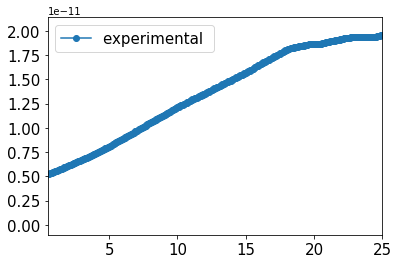

In [ ]:
# Mean Square Displacement
MSD = np.zeros(495)
# # MSD[0]=0
# t=t[1:]
for tau in range (494):
    MSD[tau+1] = np.average((x[:,tau+1:]-x[:,:-tau-1])**2+(y[:,tau+1:]-x[:,:-tau-1])**2)
plt.plot(t,MSD,'o-',label='experimental ')
plt.xlim(0.5, 25)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show

In [ ]:
from scipy.optimize import curve_fit

yy = np.zeros(290)
for tau in range (289):
    yy[tau+1] = np.average((xt[:,tau+1:]-xt[:,:-tau-1])**2+(yt[:,tau+1:]-yt[:,:-tau-1])**2)

def func(x,a,b) :
  return a*x+b

tt = t[10:300]
MSDt = MSD[10:300]
popt,pcov = curve_fit(func,tt,MSDt)


popt

array([7.39926169e-13, 4.56254096e-12])

In [ ]:
from sklearn.metrics import r2_score
MSDt = MSD[10:300]
r2 = r2_score(MSDt,popt[0]*tt+0.5e-11) 
r2

0.9874829648199883

In [ ]:
perr = np.sqrt(np.diag(pcov))
perr

array([1.57883954e-15, 1.84958427e-14])

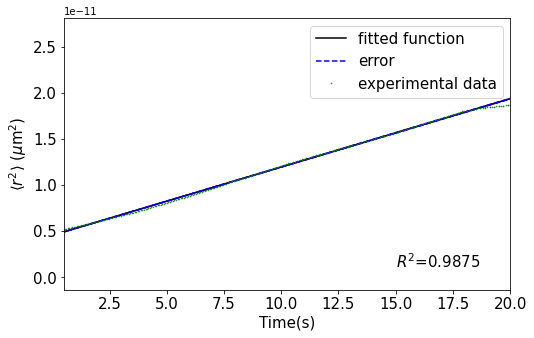

In [ ]:
xxx = np.linspace(0,30,31)
xxxx = np.linspace(0,20,21)


fig = plt.figure(1,figsize=(8,5))
plt.plot(xxx,func(xxx,popt[0],popt[1]),color='red',ms=1)
plt.plot(xxxx,func(xxxx,popt[0],popt[1]),color='black',ms=1,label='fitted function')
plt.plot(xxxx,func(xxxx,popt[0]+perr[0],popt[1]),'--',ms=1,color='blue',label='error')
plt.plot(xxxx,func(xxxx,popt[0]-perr[0],popt[1]),'--',ms=1,color='blue')
plt.plot(t,MSD,'o',color='green',ms=0.5,label='experimental data')
plt.xlim(0.5, 20)
plt.text(15,0.1e-11,f'$R^2$={r2:.4f}',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time(s)',fontsize=15)
plt.ylabel('$	\langle  r^2 	\\rangle $ ($\mu$m$^2$)',fontsize=15)
plt.savefig('MSDfitted_3.png')
plt.show()

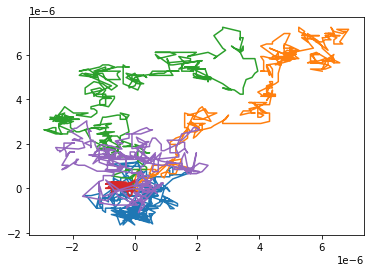

In [ ]:
plt.plot(df['x1'],df['y1'],df['x2'],df['y2'],df['x3'],df['y3'], df['x4'],df['y4'], df['x5'],df['y5'])

In [ ]:
m = popt[0]
m

7.399261694829944e-13

In [ ]:
err = perr[0]
err

1.5788395405908946e-15